<a href="https://colab.research.google.com/github/linnea-evanson/Adaptive_Signal_Processing_Machine_Intelligence/blob/main/ASPMI_Q4_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 13

In [ ]:
!git clone https://github.com/am5113/ASPMI_DeepLearning.git
# !pip install -r ASPMI_DeepLearning/requirements.txt # don't run this - the particular versions of some requirements seem to be causing an issue

Cloning into 'ASPMI_DeepLearning'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Unpacking objects: 100% (25/25), done.


In [ ]:
import sys
base_path = 'ASPMI_DeepLearning/'
sys.path.insert(0, base_path) 

In [ ]:
from utilities import *

In [ ]:
deep_network_layers = [10,5, 5, 5,1]
epochs = 20000
learning_rate = 1e-2
noise_power = 0.15

In [ ]:
X = np.load(base_path+'X.npy')
y = np.load(base_path+'y.npy') 
y += np.sqrt(noise_power)*np.random.randn(y.shape[0])

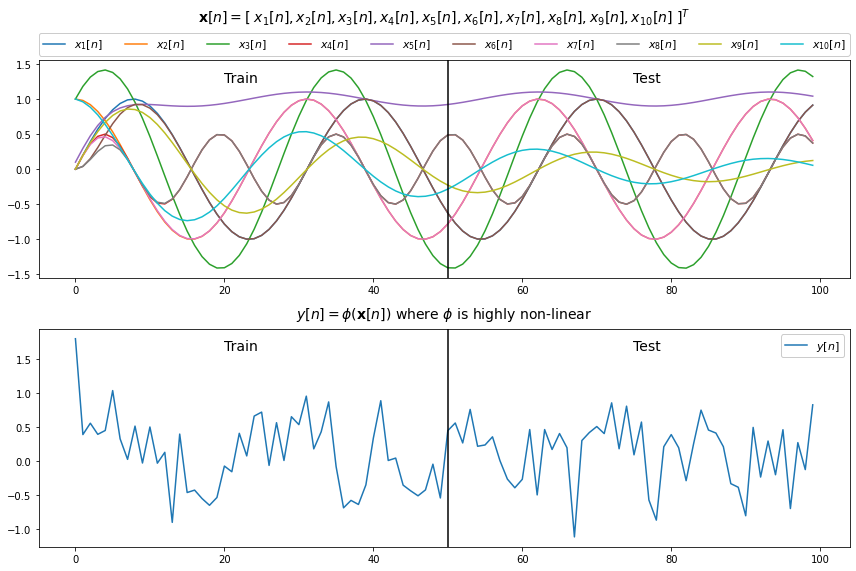

In [ ]:
plot_data(X, y)

In [ ]:
models = [LMS(), nonlinear_LMS(), deep_network(deep_network_layers)]

loss = train_models(X, y, models, epochs, learning_rate)

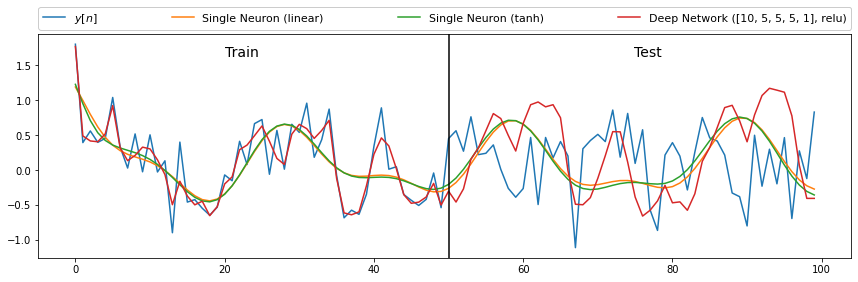

In [ ]:
def plot_output(X, y, models, deep_network_layers):
    plt.figure(figsize=(12,4))
    ax = plt.subplot(1,1,1)
    plt.plot(y)
    [plt.plot(model(torch.Tensor(X)).detach().numpy()) for model in models]
    plt.axvline(x=50,color='k')
    plt.text(0.25, 0.9, 'Train', horizontalalignment='center', fontsize=14, transform = ax.transAxes)
    plt.text(0.75, 0.9, 'Test', horizontalalignment='center', fontsize=14, transform = ax.transAxes)
    leg = plt.legend(['$y[n]$','Single Neuron (linear)','Single Neuron (tanh)','Deep Network ('+str(deep_network_layers)+', relu)'],
               bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=10, mode="expand", borderaxespad=0., fontsize=11)
    leg.get_frame().set_alpha(1)
    plt.tight_layout()

plot_output(X, y, models, deep_network_layers)
plt.tight_layout(pad=1)
plt.savefig(f'model_outputs_noise_{noise_power}.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


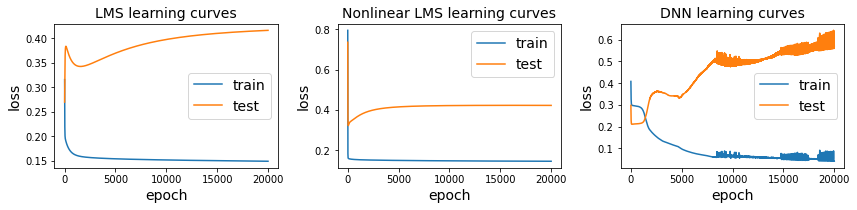

In [ ]:
model_labels = ['LMS', 'Nonlinear LMS', 'DNN']

def plot_learning_curves(loss):
    plt.figure(figsize=(12,3))
    gs = gridspec.GridSpec(1, 3) 

    for i, l in enumerate(loss):
        plt.subplot(gs[i])
        plt.plot(l[0])
        plt.plot(l[1])
        plt.legend(['train', 'test'])
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title(f'{model_labels[i]} learning curves')

plot_learning_curves(loss)
plt.tight_layout(pad=1)
plt.savefig(f'learning_curves_{noise_power}.eps', format='eps')